In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import keras
import os
import re
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping
history = History()

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
import glob
import cv2
from matplotlib.image import imread
from tensorflow.keras.callbacks import History
history = History()
from tensorflow.keras.utils import to_categorical

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,  Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirname = "/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128"
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0

dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_3 1
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_4 128
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_5 128
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_2 128
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_1 128
/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_6 128
Directorios leidos: 6
Imagenes en cada directorio [129, 128, 128, 128, 128, 127]
suma Total de imagenes en subdirs: 768


In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  768


In [ ]:
posturas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    posturas.append(name[len(name)-1])
    indice=indice+1

0 Clase_3
1 Clase_4
2 Clase_5
3 Clase_2
4 Clase_1
5 Clase_6


In [ ]:
y = np.array(labels)
X = np.array(images) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  6
Output classes :  [0 1 2 3 4 5]


In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (614, 128, 128, 3) (614,)
Testing data shape :  (154, 128, 128, 3) (154,)


In [ ]:

img_x = 128
img_y = 128
img_z = 3
num_classes = 6

batch_size = 16
epochs = 10

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
input_shape = (img_x, img_y, img_z)

# convert the data to the right type
#train_X = train_X.reshape(train_X.shape[0], img_x, img_y, img_z)
#test_X = test_X.reshape(test_X.shape[0], img_x, img_y, img_z)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes)

train_X shape: (614, 128, 128, 3)
614 train samples
154 test samples


In [ ]:

custom_early_stopping = EarlyStopping(monitor="loss",patience=7)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model_train = model.fit(train_X, train_Y, batch_size=batch_size,
          epochs=epochs, verbose=1,
          validation_data=(test_X, test_Y),
          callbacks=[custom_early_stopping])

train_score = model.evaluate(train_X, train_Y, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

Epoch 1/10
39/39 [==============================] - 2s 30ms/step - loss: 2.2288 - accuracy: 0.1629 - val_loss: 1.7718 - val_accuracy: 0.2013
Epoch 2/10
39/39 [==============================] - 1s 24ms/step - loss: 1.7279 - accuracy: 0.2362 - val_loss: 1.7301 - val_accuracy: 0.2987
Epoch 3/10
39/39 [==============================] - 1s 24ms/step - loss: 1.4980 - accuracy: 0.4169 - val_loss: 1.6226 - val_accuracy: 0.4351
Epoch 4/10
39/39 [==============================] - 1s 24ms/step - loss: 1.1699 - accuracy: 0.5977 - val_loss: 1.5570 - val_accuracy: 0.5130
Epoch 5/10
39/39 [==============================] - 1s 24ms/step - loss: 0.7802 - accuracy: 0.7345 - val_loss: 1.4476 - val_accuracy: 0.5844
Epoch 6/10
39/39 [==============================] - 1s 23ms/step - loss: 0.5356 - accuracy: 0.7997 - val_loss: 1.2598 - val_accuracy: 0.6039
Epoch 7/10
39/39 [==============================] - 1s 24ms/step - loss: 0.4024 - accuracy: 0.8534 - val_loss: 1.2186 - val_accuracy: 0.6688
Epoch 8/10
39

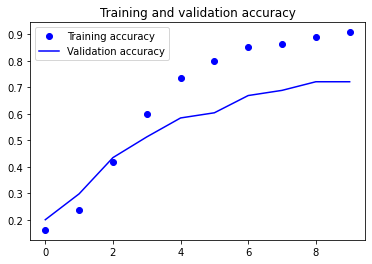

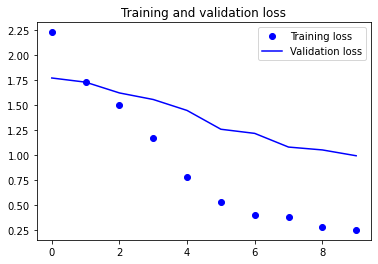

In [ ]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
model.save("model_CNN.h5py")

In [ ]:
predicted_classes2 = model.predict(test_X)

In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((154,), (154, 6))

In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_4/CWT9.png']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (128, 128),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], posturas[img_tagged.tolist().index(max(img_tagged))])

/content/drive/MyDrive/TESIS/VALIDACIÓN_EXPERMENTOS_CWT/ONE_TO_ONE/P4_128/Clase_4/CWT9.png Clase_4
